In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import math
import os

In [71]:
def load_json(src_path):
    with open(src_path, 'r') as src_file:
        output = json.load(src_file)
    return output

In [72]:
src_path = 'data/activations/divergence_20.json'

In [75]:
divergence_dict = load_json(src_path)

In [90]:
divergence_dict_filtered = dict()
for k, v in divergence_dict.items():
    if not math.isnan(v):
        divergence_dict_filtered[k] = v

In [100]:
sorted_divergences = {k: v for k, v in sorted(divergence_dict_filtered.items(), key=lambda item: item[1], reverse=True)}
sorted_divergences

{'7439': 0.8325546111576978,
 '10480': 0.8325546111576978,
 '13479': 0.8325546111576978,
 '1212': 0.8325546111576977,
 '5821': 0.8325546111576977,
 '7622': 0.8325546111576977,
 '9250': 0.8325546111576977,
 '9317': 0.8325546111576977,
 '16154': 0.7626930902494063,
 '13276': 0.7608562453951294,
 '594': 0.7594169139854027,
 '11363': 0.7028268990457806,
 '6645': 0.6873211328000315,
 '5861': 0.684261004816453,
 '9024': 0.6745445628024263,
 '15742': 0.6658995675984698,
 '2234': 0.663709620078819,
 '5108': 0.6636274039851008,
 '13546': 0.6600276385653198,
 '4869': 0.6584447878543904,
 '13156': 0.6517317668923096,
 '16273': 0.6502387678692824,
 '16277': 0.6450842266429948,
 '15701': 0.6437534437543329,
 '3202': 0.6431460377196179,
 '1070': 0.6424372752568317,
 '6192': 0.6424372752568317,
 '7295': 0.6424372752568317,
 '2575': 0.6424372752568315,
 '6007': 0.6424372752568313,
 '9785': 0.6418563766533298,
 '4021': 0.6404690935457416,
 '10789': 0.6304377977708271,
 '6372': 0.6288328534863414,
 '259

In [93]:
def load_feature_activations(activations_dict, feature_idx):
    activations = {'yes':[], 'no':[]}
    for sentence_dict in activations_dict.values():
        sentence_activations_dict = sentence_dict['step_by_step_non_zero_activations']
        sentence_label = sentence_dict['truth_label']
        for token_activations in sentence_activations_dict:
            if feature_idx in token_activations:
                activations[sentence_label].append(token_activations[feature_idx])
    return activations   

In [94]:
activations_path = 'data/activations/output_20.json'
num_components = 16384

activations_dict = load_json(activations_path)

7439


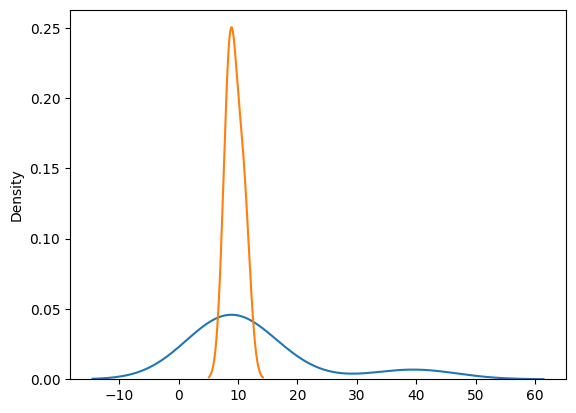

10480


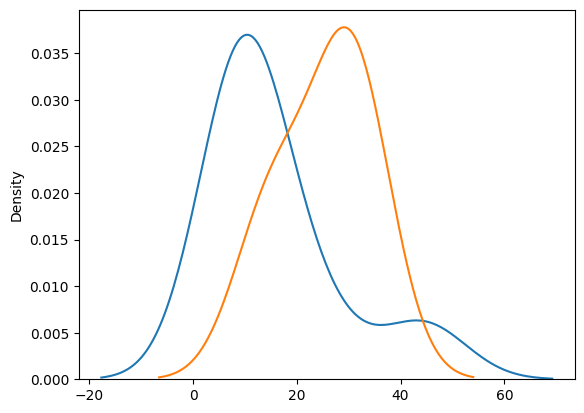

13479


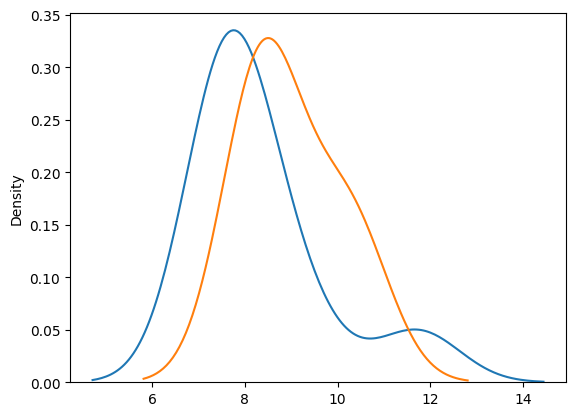

1212


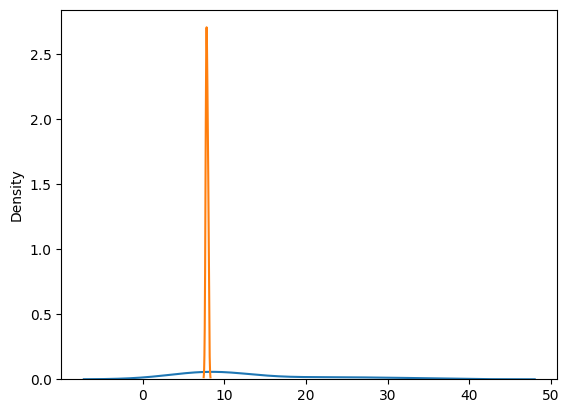

5821


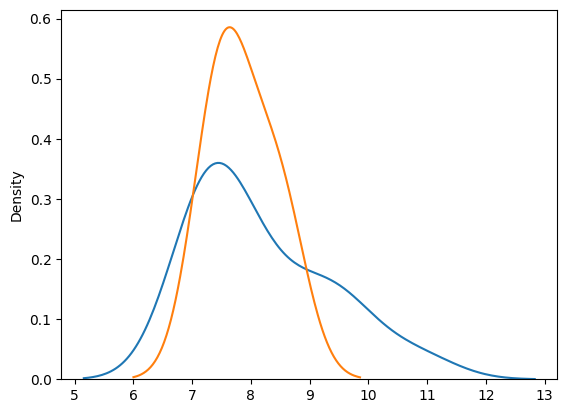

7622


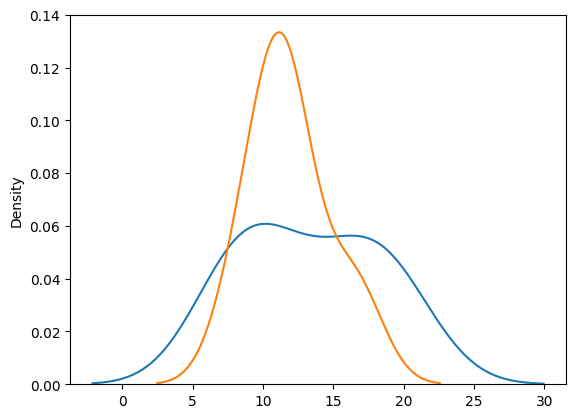

9250


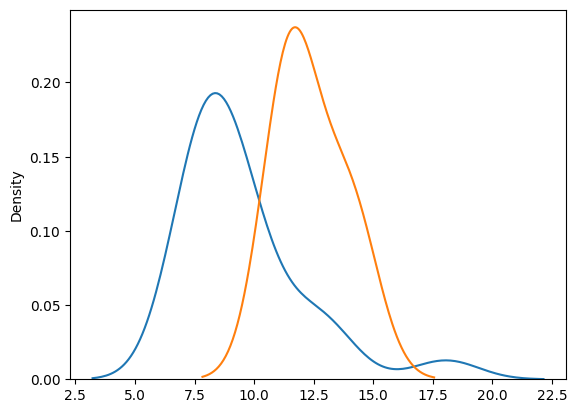

9317


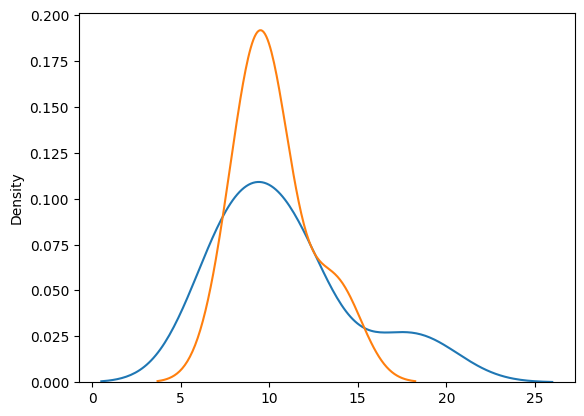

16154


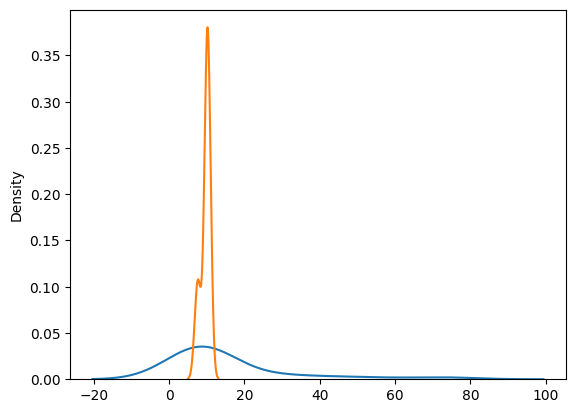

13276


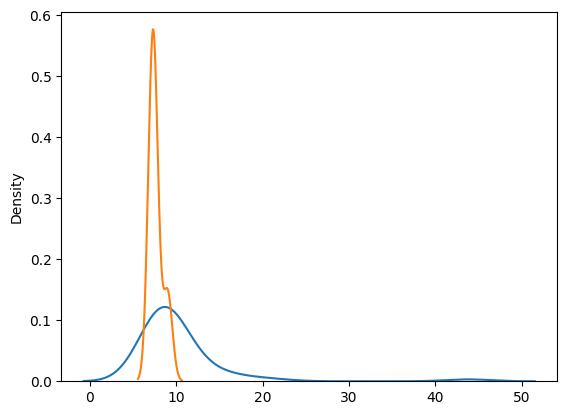

In [102]:
for feature_idx in list(sorted_divergences.keys())[:10]:
    activations = load_feature_activations(activations_dict, feature_idx)
    print(feature_idx)
    sns.kdeplot(activations['yes'])
    sns.kdeplot(activations['no'])
    plt.show()

In [ ]:
def estimate_probability_distribution(data, bins='auto'):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    hist = hist / np.sum(hist)
    return hist, bin_edges

Feat 9721
Shannon = 0.5996756406899808
Yes  = 86, No = 21


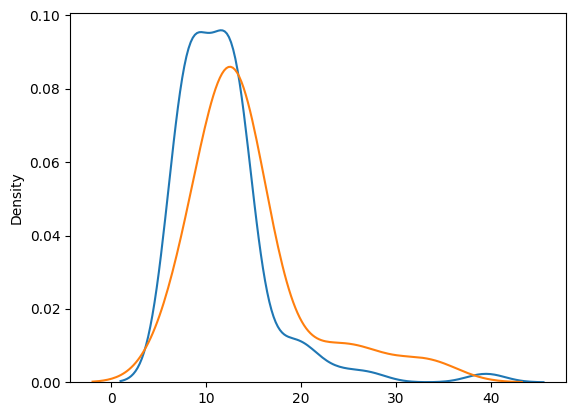

Feat 12827
Shannon = 0.5880347878088652
Yes  = 153, No = 17


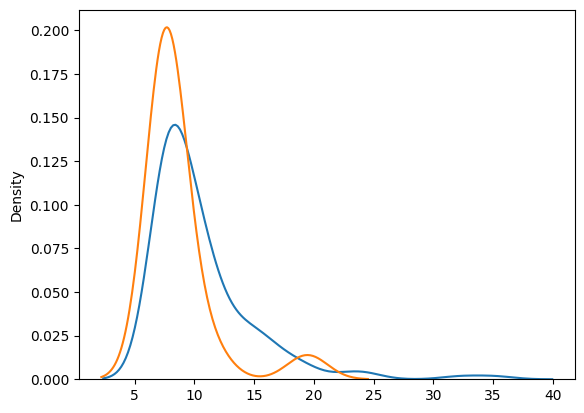

Feat 16123
Shannon = 0.5581314730529676
Yes  = 1309, No = 364


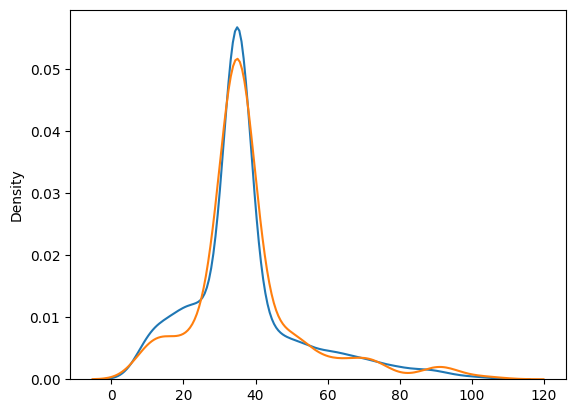

Feat 931
Shannon = 0.5570098116513607
Yes  = 1367, No = 391


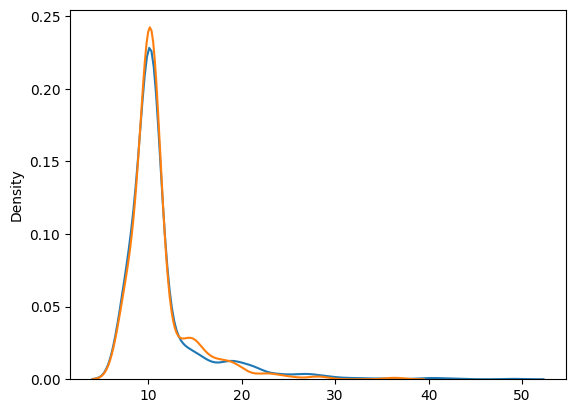

Feat 1822
Shannon = 0.5490420737251981
Yes  = 1242, No = 337


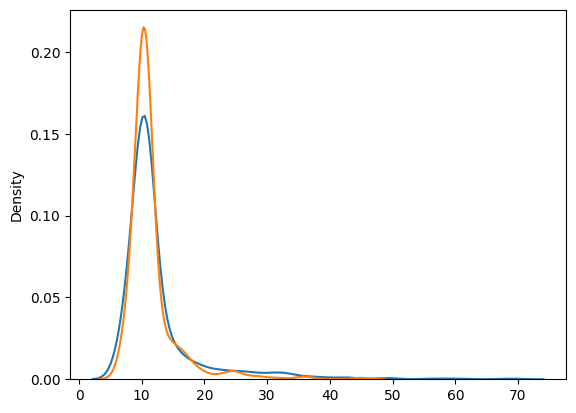

Feat 2823
Shannon = 0.5458403154307159
Yes  = 92, No = 14


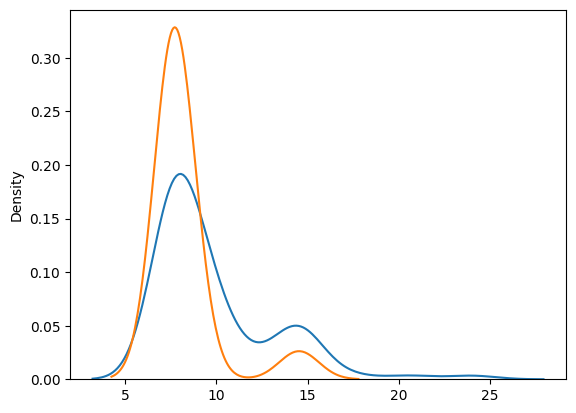

Feat 4593
Shannon = 0.545416072701821
Yes  = 1173, No = 382


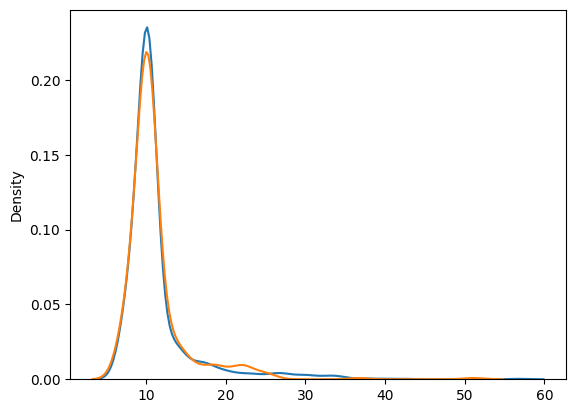

Feat 825
Shannon = 0.542245740868441
Yes  = 1192, No = 322


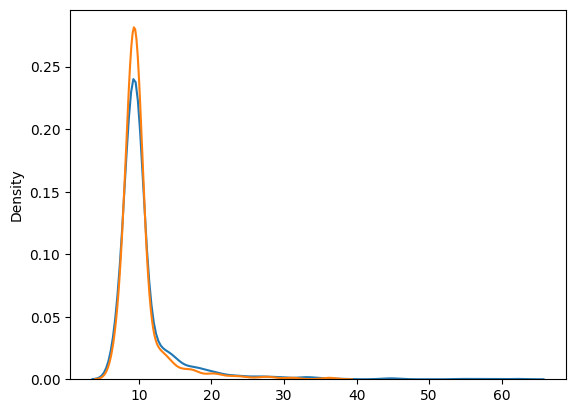

Feat 8770
Shannon = 0.5314853618050271
Yes  = 152, No = 18


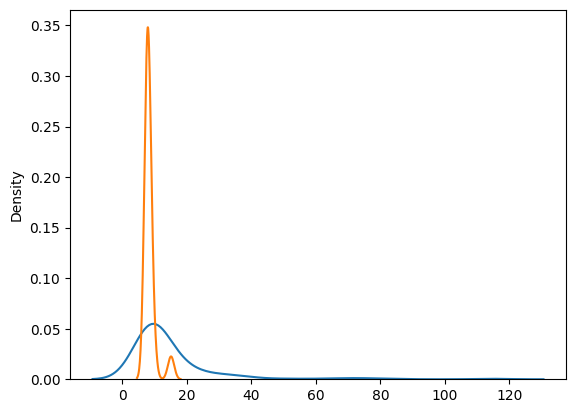

Feat 5191
Shannon = 0.5284377080900021
Yes  = 1213, No = 295


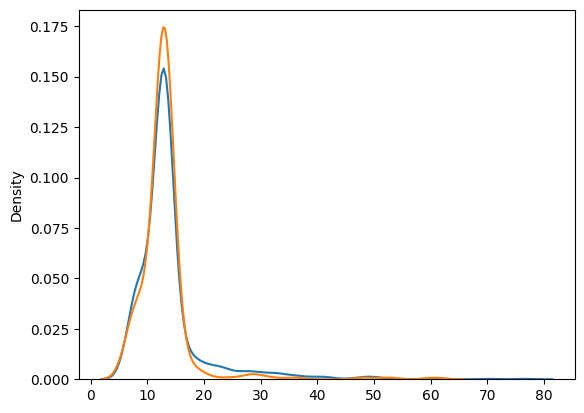

Feat 12760
Shannon = 0.5279888445749172
Yes  = 1078, No = 357


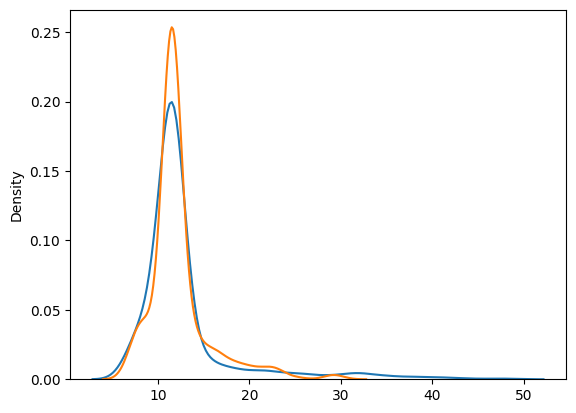

Feat 5216
Shannon = 0.5270076761488229
Yes  = 1007, No = 375


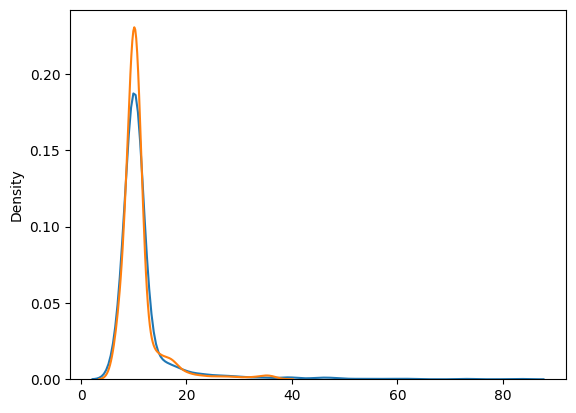

Feat 8245
Shannon = 0.5251428560278679
Yes  = 1078, No = 341


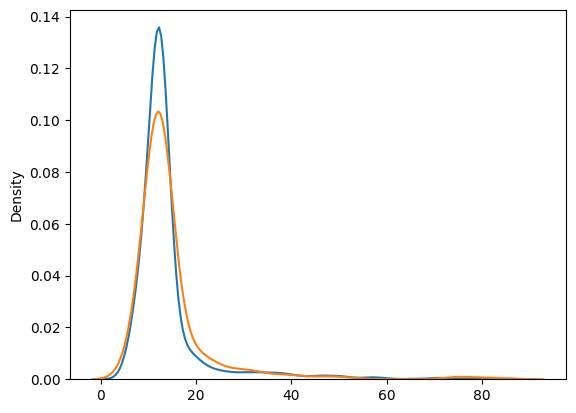

Feat 7585
Shannon = 0.5217145712626164
Yes  = 1087, No = 314


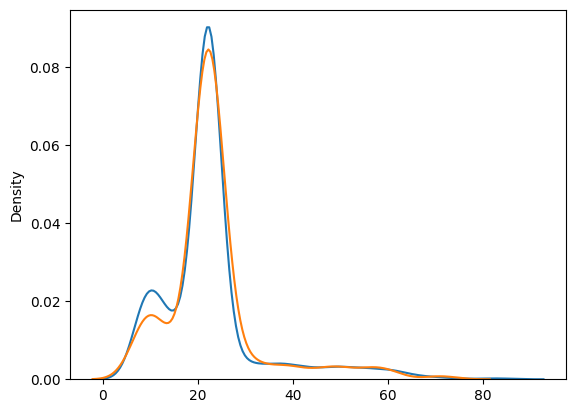

Feat 6452
Shannon = 0.5188358402871478
Yes  = 1068, No = 361


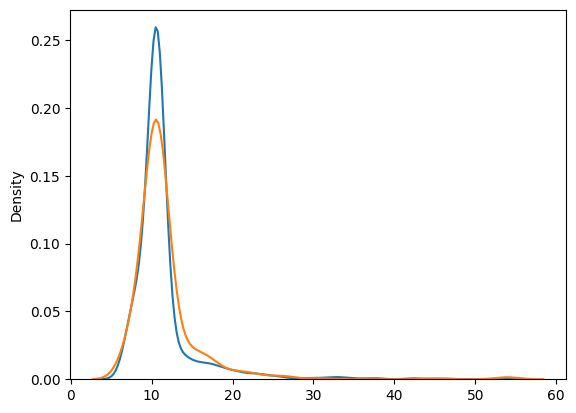

Feat 12214
Shannon = 0.5176125261242905
Yes  = 1037, No = 321


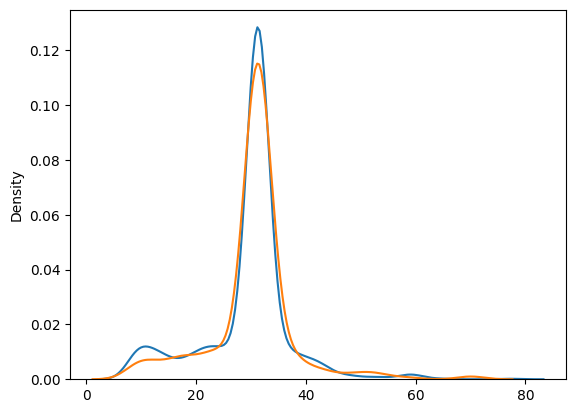

Feat 14976
Shannon = 0.5165666412625258
Yes  = 1046, No = 315


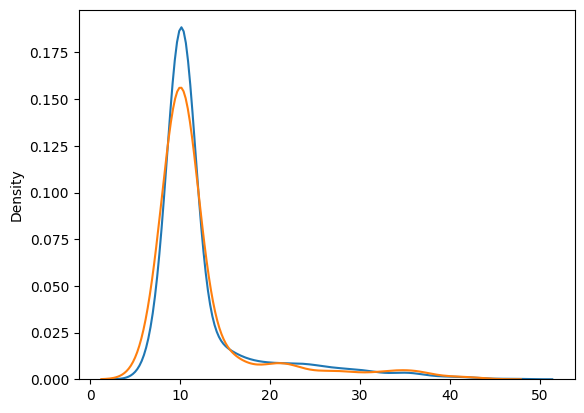

Feat 13265
Shannon = 0.5164500831403117
Yes  = 1041, No = 317


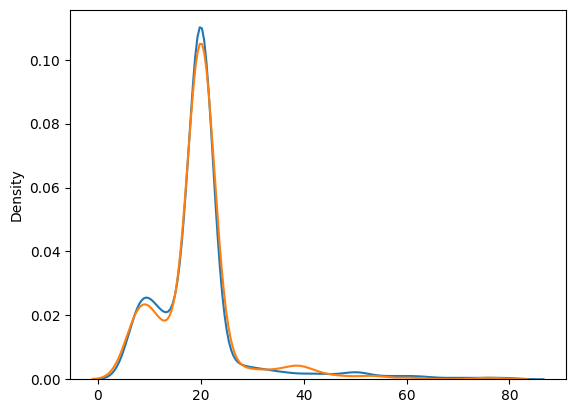

Feat 13258
Shannon = 0.5120292791076859
Yes  = 1054, No = 311


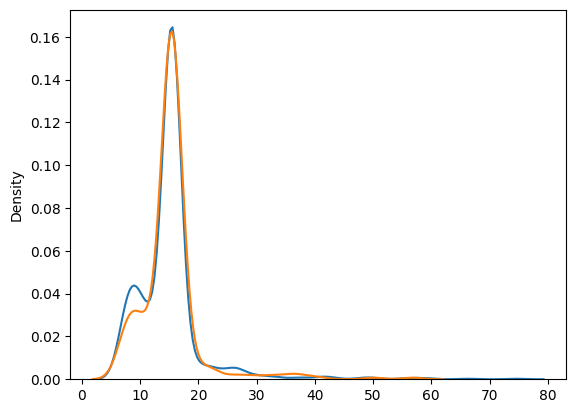

Feat 12780
Shannon = 0.5119018511052905
Yes  = 1227, No = 261


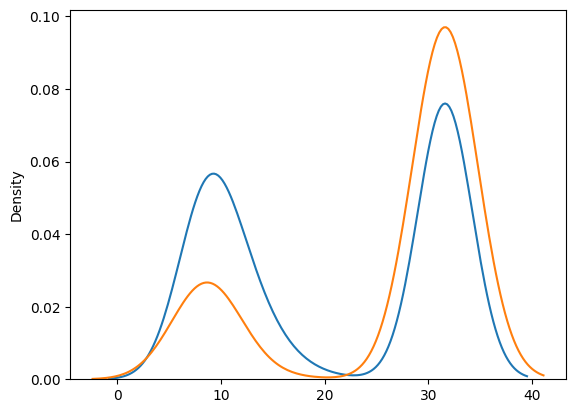

Feat 11640
Shannon = 0.510910246817914
Yes  = 1017, No = 325


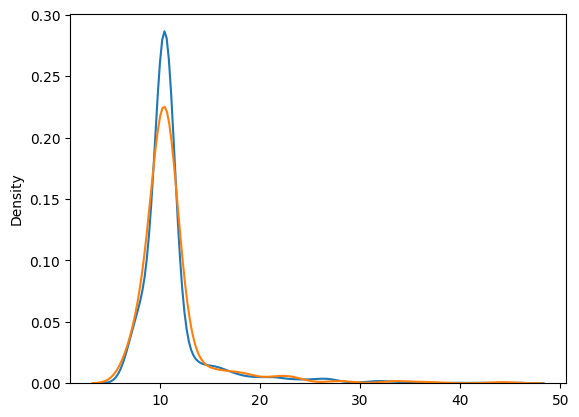

Feat 10251
Shannon = 0.5101188567591949
Yes  = 986, No = 339


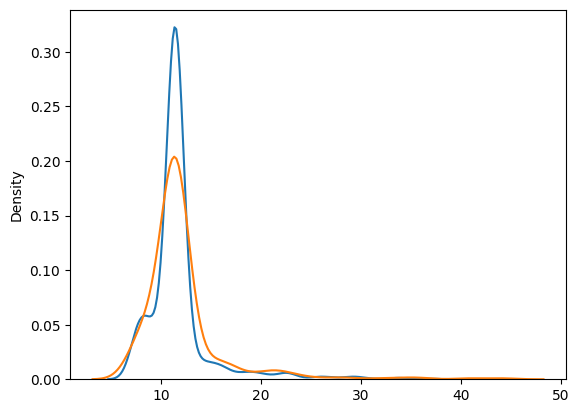

Feat 11674
Shannon = 0.5089807830987704
Yes  = 1017, No = 327


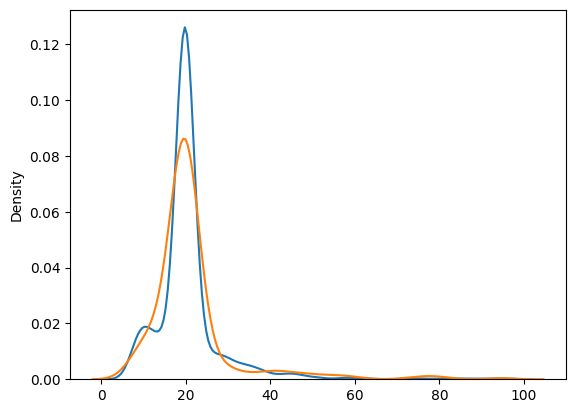

Feat 11445
Shannon = 0.5076810044636865
Yes  = 1049, No = 309


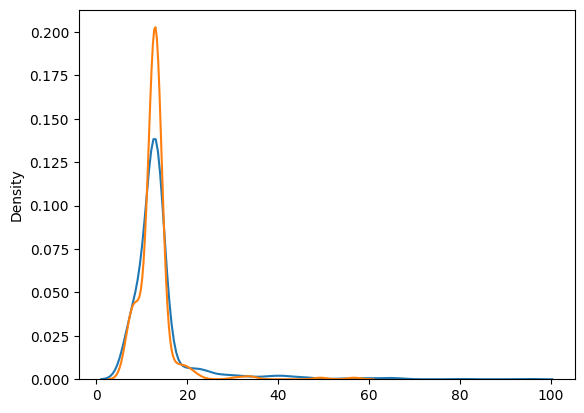

Feat 1576
Shannon = 0.5053271020837399
Yes  = 86, No = 21


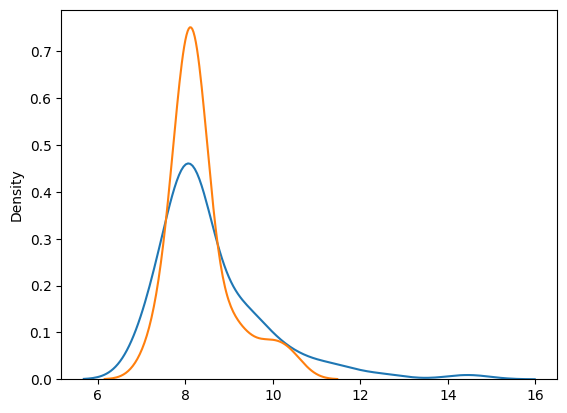

Feat 13919
Shannon = 0.5044411525880614
Yes  = 968, No = 339


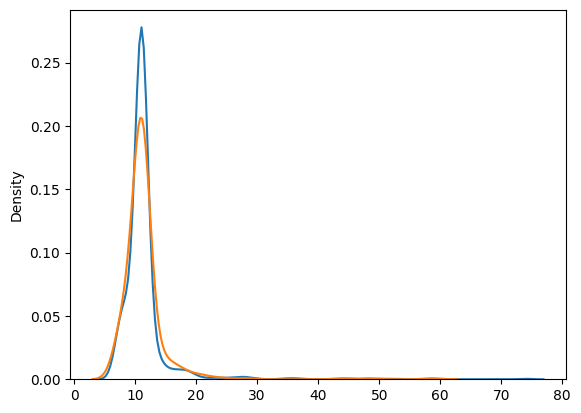

Feat 4403
Shannon = 0.5039009515202225
Yes  = 1047, No = 301


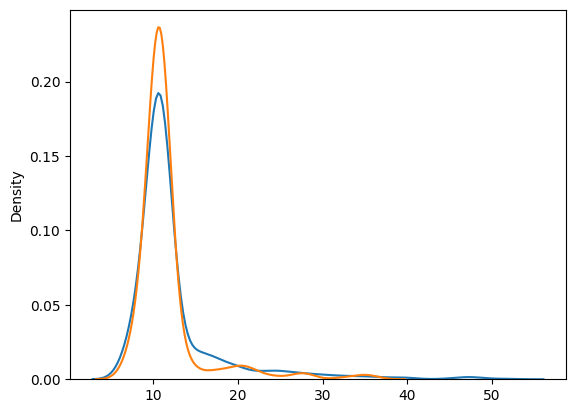

Feat 11104
Shannon = 0.5032234494747592
Yes  = 996, No = 333


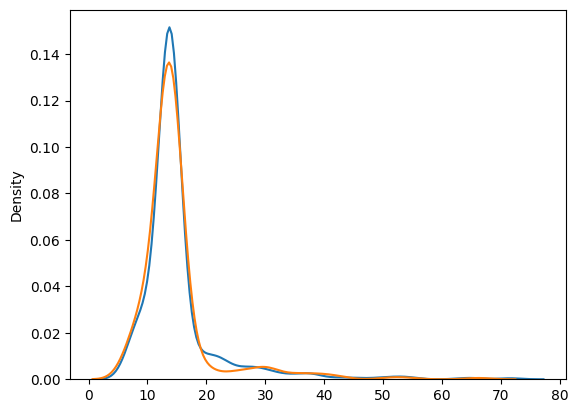

Feat 3610
Shannon = 0.5027121931671038
Yes  = 996, No = 319


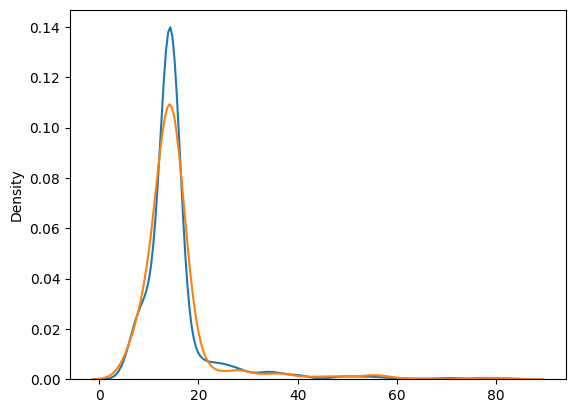

Feat 3345
Shannon = 0.5023729677957298
Yes  = 982, No = 343


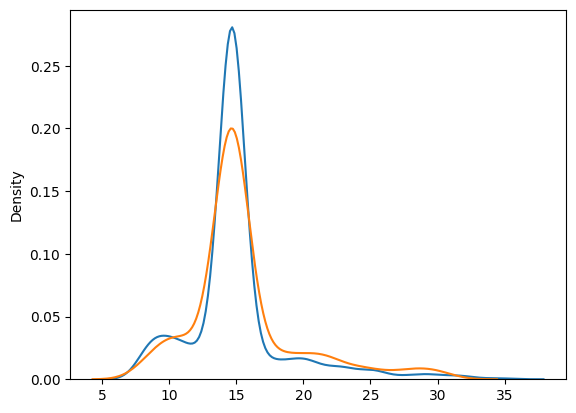

In [139]:
for feature_idx in list(sorted_divergences.keys()):
    if sorted_divergences[feature_idx] < 0.5:
        break
    activations = load_feature_activations(activations_dict, feature_idx)
    num_yes = len(activations['yes'])
    num_no = len(activations['no'])

    if num_yes + num_no >= 100:
        print(f'Feat {feature_idx}')
        print(f'Shannon = {sorted_divergences[feature_idx]}')
        print(f'Yes  = {num_yes}, No = {num_no}')
        sns.kdeplot(activations['yes'])
        sns.kdeplot(activations['no'])
        plt.show()